<a href="https://colab.research.google.com/github/wassanchez/DS_Brayan_Andru/blob/main/SistNoSuperv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# Aqui se usa el algoritmo kmeans

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática

In [ ]:
# X,y = make_blobs(n_samples=100, n_features=2, centers=2,cluster_std=1,random_state=10) #las caracteristicas son la cant de variables que van a estar jugando
                          # numero de centroides son los numeros de clasificaciones
                          # una desviacion estandar de 1
# X,y = make_blobs(n_samples=500, n_features=2, centers=4,cluster_std=4,random_state=10) #las caracteristicas son la cant de variables que van a estar jugando
X,y = make_blobs(n_samples=500, n_features=3, centers=2,cluster_std=4,random_state=10)

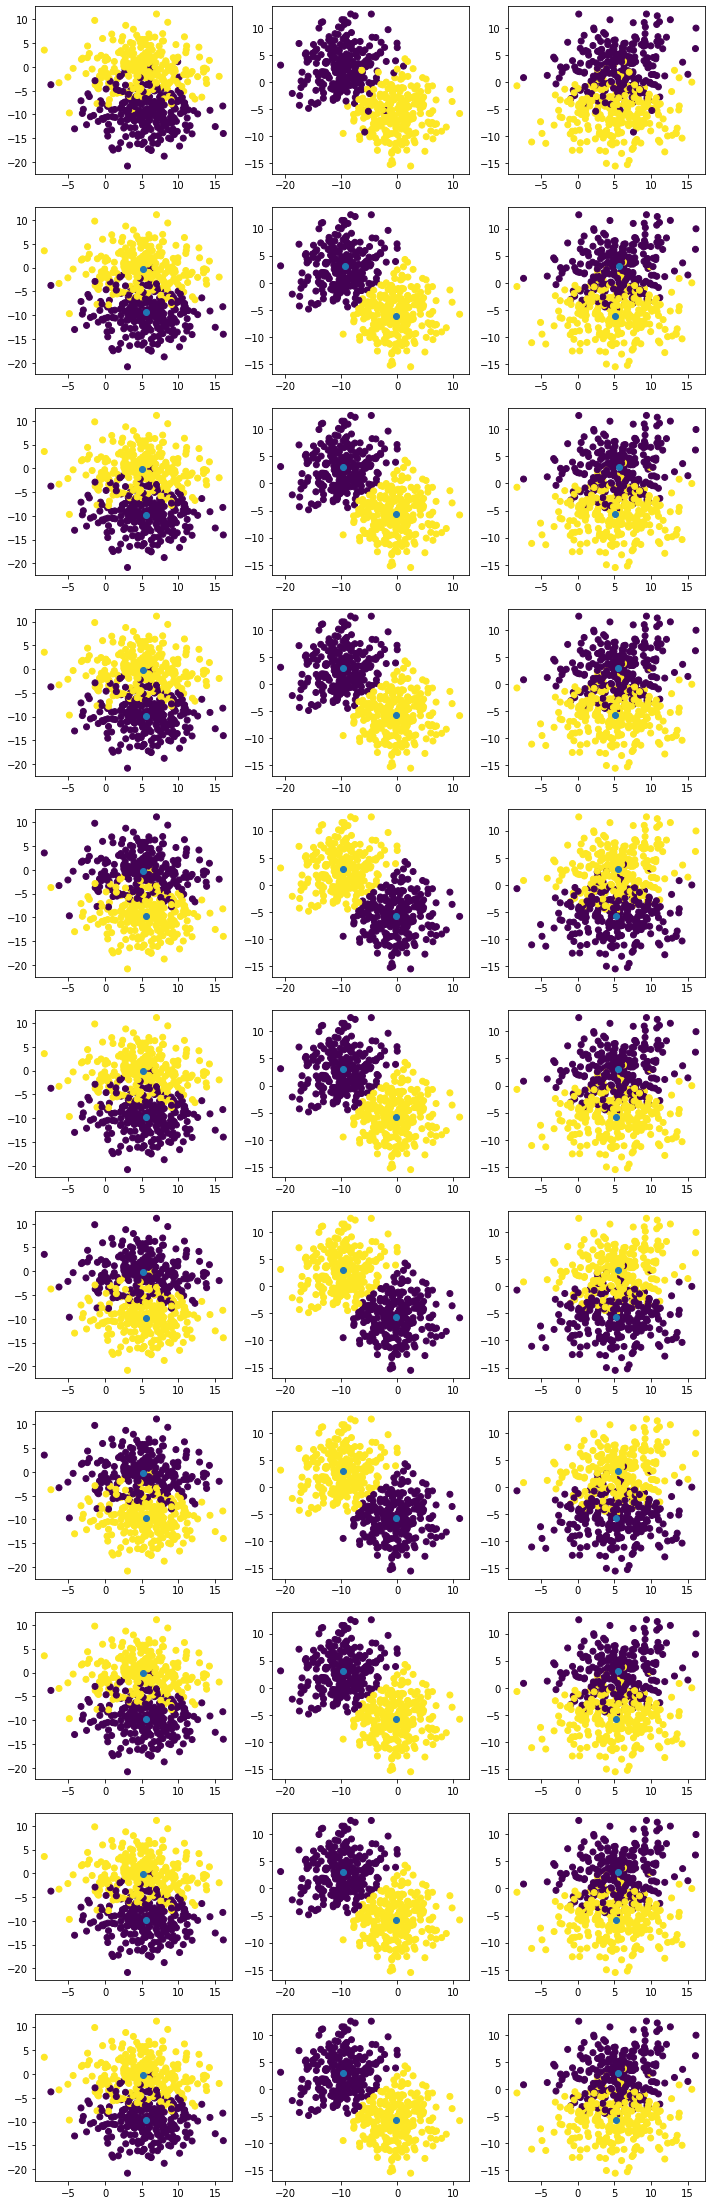

In [ ]:
# fig,axs = plt.subplots(11,3, figsize=(12,40))# el 4 quiere decir que se generaran 4 graficos
# # fig,axs = plt.subplots(11,4, figsize=(440,4))# el 4 quiere decir que se generaran 4 graficos
# axs[0].scatter(X[:,0], X[:,1],c=y)
# for i in range(1,10):
#   kMeans_cluster = KMeans(n_clusters=2, max_iter=i, init='random')
#   # kMeans_cluster = KMeans(n_clusters=2, max_iter=10, init='random')
#   clusters = kMeans_cluster.fit_predict(X)
#   centers = kMeans_cluster.cluster_centers_
#   clusters

#   axs[i].scatter(X[:,0],X[:,1],c=clusters)
#   axs[i].scatter(centers[:,0],centers[:,1])
fig,axs = plt.subplots(11,3, figsize = (12,40))#[1,2,3,4]

axs[0][0].scatter(X[:,0],X[:,1],c = y)
axs[0][1].scatter(X[:,1],X[:,2],c = y)
axs[0][2].scatter(X[:,0],X[:,2],c = y)
for i in range(1,11):
  kmeans_cluster = KMeans(n_clusters = 2, max_iter= i,
                          init='random')
  clusters = kmeans_cluster.fit_predict(X)
  center = kmeans_cluster.cluster_centers_
  clusters

  axs[i][0].scatter(X[:,0],X[:,1],c = clusters)
  axs[i][0].scatter(center[:,0],center[:,1])
  axs[i][1].scatter(X[:,1],X[:,2],c = clusters)
  axs[i][1].scatter(center[:,1],center[:,2])
  axs[i][2].scatter(X[:,0],X[:,2],c = clusters)
  axs[i][2].scatter(center[:,0],center[:,2])

In [ ]:
# X,y = make_blobs(n_samples= 500, n_features=3, centers= 4, cluster_std = 3, random_state=10)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d( x=X[:,0], y=X[:,1], z=X[:,2],
#               color=y)
# fig.show()

# Codigo Sistema No Supervisado Datos Propios

In [ ]:
## Generador de Datos
# X,y = make_blobs(n_samples= 500, n_features=3, centers= 2, cluster_std = 1, random_state=10)

In [ ]:
#ESTE CODIGO GENERA LOS GRAFICOS PARA VER LA EVOLUCION DE LOS DIFERENTES CENTROIDES EN CADA CARACTERISTICA O CLUSTERS O ETIQUETAS
# fig,axs = plt.subplots(11,3, figsize = (12,40))#[1,2,3,4]

# axs[0][0].scatter(X[:,0],X[:,1],c = y)
# axs[0][1].scatter(X[:,1],X[:,2],c = y)
# axs[0][2].scatter(X[:,0],X[:,2],c = y)
# for i in range(1,11):
#   kmeans_cluster = KMeans(n_clusters = 2, max_iter= i,
#                           init='random')
#   clusters = kmeans_cluster.fit_predict(X)
#   center = kmeans_cluster.cluster_centers_
#   clusters

#   axs[i][0].scatter(X[:,0],X[:,1],c = clusters)
#   axs[i][0].scatter(center[:,0],center[:,1])
#   axs[i][1].scatter(X[:,1],X[:,2],c = clusters)
#   axs[i][1].scatter(center[:,1],center[:,2])
#   axs[i][2].scatter(X[:,0],X[:,2],c = clusters)
#   axs[i][2].scatter(center[:,0],center[:,2])

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBERO/Titanic/train.csv')

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
X = df_train[['Age','Fare','Survived']]
X

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [ ]:
X = X.dropna()
X

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,0
887,19.0,30.0000,1
889,26.0,30.0000,1


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
y = X['Survived']
X = X[['Age', 'Fare']]
# selecciona los datos numericos o columnas que son numericas
x_num = X.select_dtypes(include = np.number).columns
x_num

# selecciona las variables o columnas categoricas
x_cat = X.select_dtypes(include = np.object).columns
x_cat

## ESCALAMIENTO #####
# Este estimador escala y traduce cada característica individualmente de modo que esté en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno.
num_tras = Pipeline(steps=[('scaler',MinMaxScaler(feature_range=(0,1)))])
# Esto crea una columna binaria para cada categoría y devuelve una matriz dispersa o una matriz densa (dependiendo del sparse parámetro)
cat_tras = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

#
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num',num_tras,x_num),
        ('cat',cat_tras,x_cat)
    ]
)
preprocesamiento 

# aqui se obtienen los datos ya transformados osea los numericos y lo scategoricos
prepro_tra = preprocesamiento.fit_transform(X)
print(prepro_tra.shape)
type(prepro_tra)
prepro_tra

# preprocesamiento .named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
# preprocesamiento .named_transformers_['num'].named_steps['scaler'].get_feature_names_out()

df_prepro_tra = pd.DataFrame(prepro_tra)
df_prepro_tra

(714, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,0,1
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
709,0.484795,0.056848
710,0.334004,0.025374
711,0.233476,0.058556
712,0.321438,0.058556


In [ ]:
X = df_prepro_tra

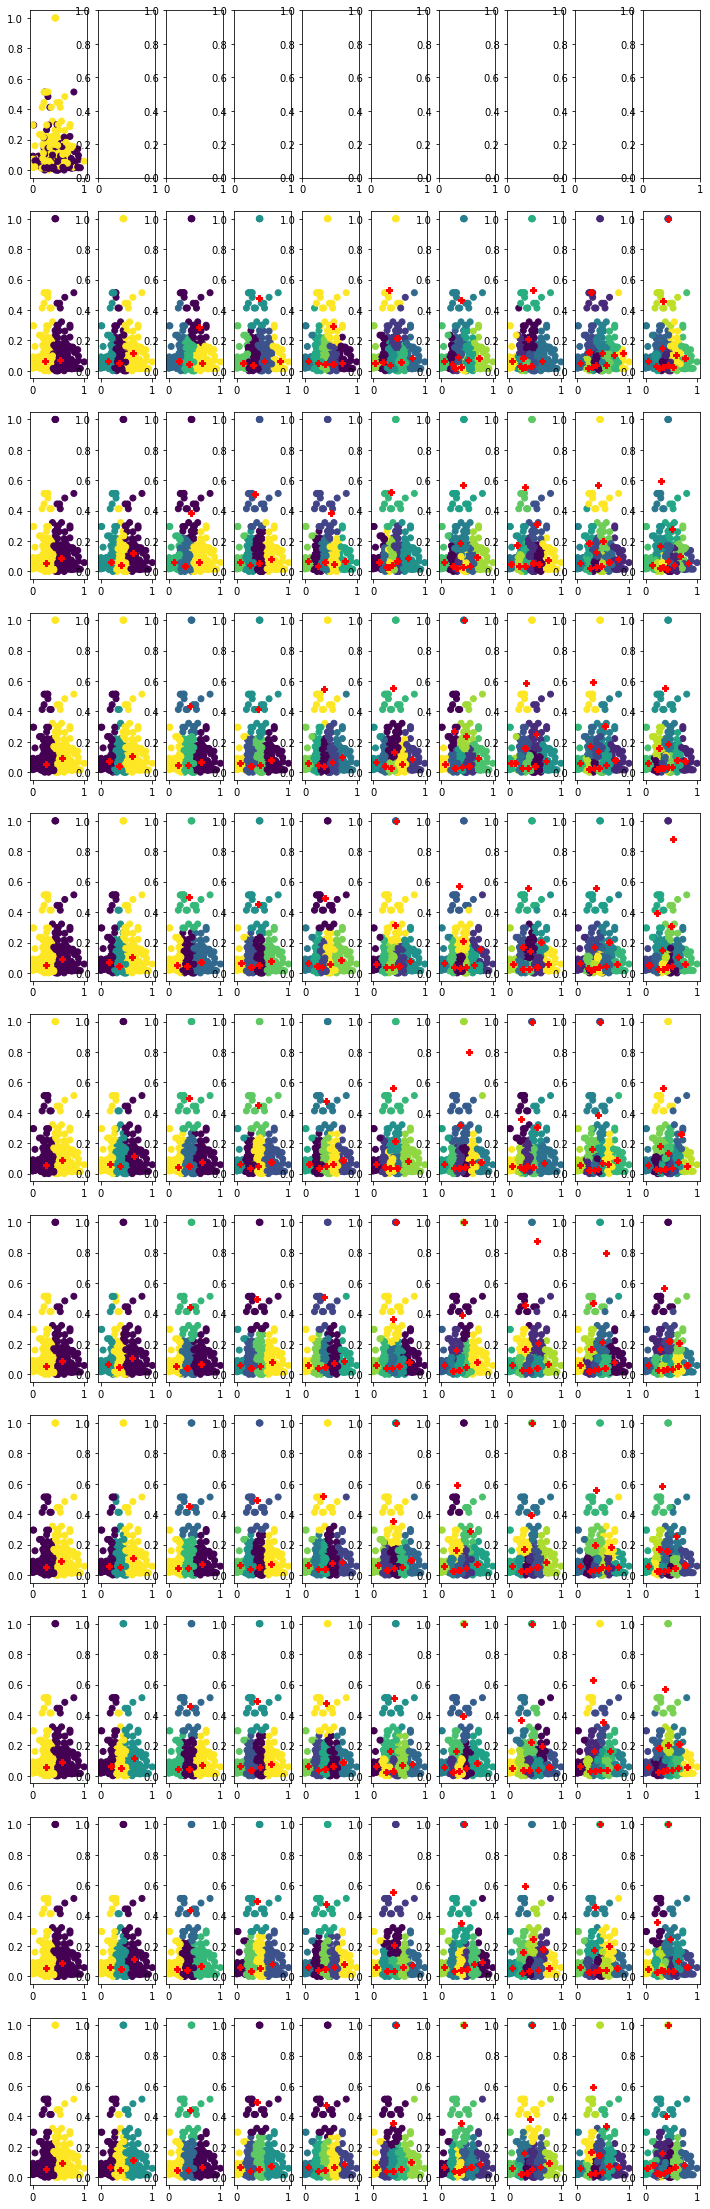

In [ ]:
##AQUI SE CORRE EL ALGORITMO KMEANS VARIAS VECES PARA LOGRAR VER CUANDO SE ADAPTA MEJOR

fig,axs = plt.subplots(11,10, figsize = (12,40))#[1,2,3,4]


axs[0][0].scatter(X.iloc[:,0],X.iloc[:,1], c=y)
# axs[0][1].scatter(X.iloc[:,1],X.iloc[:,2])
# axs[0][2].scatter(X.iloc[:,0],X.iloc[:,2])
for j in range(1,11):
  for i in range(1,11):
    kmeans_cluster = KMeans(n_clusters = j+1, max_iter= i,
                            init='random')
    clusters = kmeans_cluster.fit_predict(X)
    center = kmeans_cluster.cluster_centers_
    # clusters

    axs[i][j-1].scatter(X.iloc[:,0],X.iloc[:,1],c = clusters)
    axs[i][j-1].scatter(center[:,0],center[:,1],marker="P", color="red")

    # axs[i][1].scatter(X[:,1],X[:,2],c = clusters)
    # axs[i][1].scatter(center[:,1],center[:,2])

    # axs[i][2].scatter(X[:,0],X[:,2],c = clusters)
    # axs[i][2].scatter(center[:,0],center[:,2])

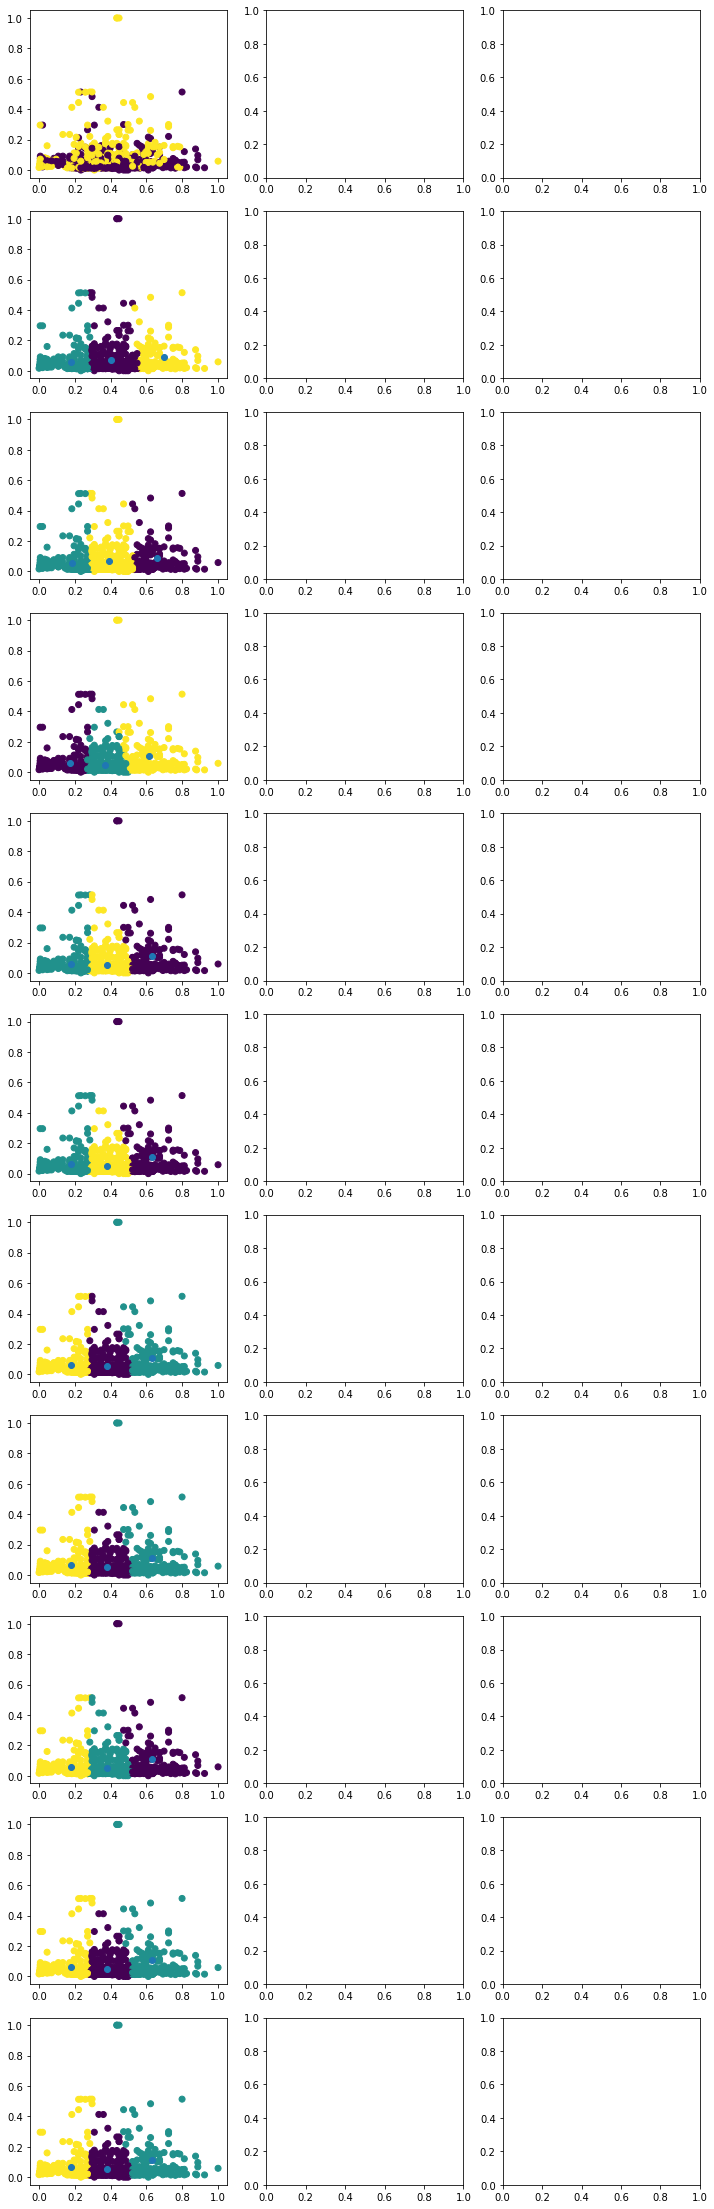

In [ ]:
fig,axs = plt.subplots(11,3, figsize = (12,40))#[1,2,3,4]

axs[0][0].scatter(X.iloc[:,0],X.iloc[:,1], c=y)
# axs[0][1].scatter(X.iloc[:,1],X.iloc[:,2])
# axs[0][2].scatter(X.iloc[:,0],X.iloc[:,2])
for i in range(1,11):
  kmeans_cluster = KMeans(n_clusters = 3, max_iter= i,
                          init='random')
  clusters = kmeans_cluster.fit_predict(X)
  center = kmeans_cluster.cluster_centers_
  clusters

  axs[i][0].scatter(X.iloc[:,0],X.iloc[:,1],c = clusters)

  axs[i][0].scatter(center[:,0],center[:,1])
  # axs[i][1].scatter(X[:,1],X[:,2],c = clusters)
  # axs[i][1].scatter(center[:,1],center[:,2])
  # axs[i][2].scatter(X[:,0],X[:,2],c = clusters)
  # axs[i][2].scatter(center[:,0],center[:,2])


In [ ]:
# X,y = make_blobs(n_samples= 500, n_features=10, centers= 4, cluster_std = 3, random_state=10)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d( x=X[:,0], y=X[:,1], z=X[:,2],
#               color=y, size_max=18)
# fig = px.scatter_3d( x=center[:,0], y=center[:,1], z=center[:,2],
#                size_max=18)
# fig.show()